In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models, utils
import numpy as np
import operator

In [2]:
# Create list of all targets (minus background noise)

dataset_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\padded'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
train_target = ['A3', 'A#3', 'B3', 'C3', 'C#3','D3', 'D#3', 'E3', 'F3', 'F#3','G3','A4']
print(all_targets)
numclasses = len(train_target)
print(numclasses)


['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4']
12


In [3]:
# Settings
feature_sets_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\audioScripts'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'AudioModel.h5'


In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(516, 16, 16)
(64, 16, 16)
(64, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[ 1.  8. 10.  8.  7. 10.  4.  5.  1.  1.  0.  6.  5.  8.  2.  0.  0. 11.
 11.  7. 11. 11. 11. 10.  6. 10.  4.  5.  7.  4.  5.  1.  2.  0.  7.  5.
  8.  7.  7.  3.  4.  1.  0.  9.  5. 10.  1. 10.  9.  6.  9.  7.  0.  1.
  4.  2.  0.  8.  0.  2.  1.  2.  6.  0.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
#ytr = []
#yv = []
#yts = []
#count = 1
#for pitch in all_targets:
#    pitch_index = all_targets.index(pitch)
#    ytr.append(np.equal(y_train, pitch_index).astype('float64'))
#    yv.append( np.equal(y_val, pitch_index).astype('float64'))
#    yts.append(np.equal(y_test, pitch_index).astype('float64'))
    #count = count + 1


In [9]:
# Peek at labels after conversion
print(y_train)

[ 9.  1. 10.  7.  7. 11.  7.  1.  1.  4.  7.  6.  3.  2. 11.  9. 11. 10.
  5.  8.  9. 10.  7.  8. 10.  5.  5.  7.  4.  9.  4.  6.  5.  5.  5.  4.
 10. 11. 11.  2.  6. 10.  6.  5.  9.  3.  2.  4.  8. 11.  0.  1.  2. 11.
  9.  2.  4.  2.  2. 11.  4. 10.  0.  7.  3.  5.  8.  1.  1.  1. 10.  6.
  4. 10.  1.  5. 11.  4.  8. 10.  8. 11.  6.  2. 10.  9.  0.  7. 10.  2.
 10.  1.  7.  8. 11.  3.  2.  2. 11.  3.  7.  5.  9.  6.  0.  2. 10.  7.
  0.  1.  2.  0.  7.  5.  1.  2. 10.  6.  1. 10.  9.  0. 11.  6.  3. 10.
 10.  6.  0.  7.  1.  0.  9.  7.  8.  0.  9.  3.  8. 10.  7.  9. 10. 11.
 11.  0.  4. 11.  4.  1.  4.  7.  5.  2.  6.  1.  1.  6.  8.  9. 10.  3.
  2.  2. 10.  2.  2.  6.  6.  5.  3.  7.  8. 10.  5.  3.  6.  1. 10.  0.
  1. 11.  0.  5.  9.  5.  9.  3.  0. 10.  4.  8.  0. 10.  2.  9.  5. 10.
  2.  9.  8.  7.  3.  6.  9.  2.  6.  8.  2.  1. 10.  1. 10.  0.  8.  5.
  8.  6.  8.  6.  9.  2.  8. 11.  4.  9.  3.  1.  0.  2.  7.  4.  6. 11.
  2.  7.  6.  6.  6.  3.  5.  4. 10.  1.  6. 10.  6

In [10]:
# What percentage of 'stop' appear in validation labels
#print(sum(y_val) / len(y_val))
#print(1 - sum(y_val) / len(y_val))

In [11]:
# View the dimensions of our input data
#print(x_train.shape)

In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

#y_train = utils.to_categorical(y_train, numclasses)
#y_test = utils.to_categorical(y_test, numclasses)
#y_val = utils.to_categorical(y_val, numclasses)

#fig=plt.figure()
#plt.imshow(x_val[11], cmap='inferno', origin='lower')

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(516, 16, 16, 1)
(64, 16, 16, 1)
(64, 16, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [23]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 2, activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.2))
#model.add(layers.Conv2D(32, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.2))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.2))

model.add(layers.Dense(numclasses, activation="softmax"))

In [24]:
# Display model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [25]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [26]:
# Train
#pitch_index = all_targets.index(pitch)
history = model.fit(x_train, 
                    y_train, 
                    epochs=500, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 [==============================] - 2s 202ms/step - loss: 3.2517 - acc: 0.0795 - val_loss: 2.6348 - val_acc: 0.0781
Epoch 2/500
6/6 [==============================] - 0s 55ms/step - loss: 2.4901 - acc: 0.1279 - val_loss: 2.3535 - val_acc: 0.1094
Epoch 3/500
6/6 [==============================] - 0s 57ms/step - loss: 2.3209 - acc: 0.1764 - val_loss: 2.2387 - val_acc: 0.1719
Epoch 4/500
6/6 [==============================] - 0s 38ms/step - loss: 2.2055 - acc: 0.2112 - val_loss: 2.1345 - val_acc: 0.1719
Epoch 5/500
6/6 [==============================] - 0s 59ms/step - loss: 2.0698 - acc: 0.2461 - val_loss: 2.1019 - val_acc: 0.2188
Epoch 6/500
6/6 [==============================] - 0s 61ms/step - loss: 1.9680 - acc: 0.2810 - val_loss: 2.0447 - val_acc: 0.2344
Epoch 7/500
6/6 [==============================] - 0s 56ms/step - loss: 1.8936 - acc: 0.2791 - val_loss: 2.0098 - val_acc: 0.1875
Epoch 8/500
6/6 [==============================] - 0s 50ms/step - loss: 1.8200 - acc: 0.2

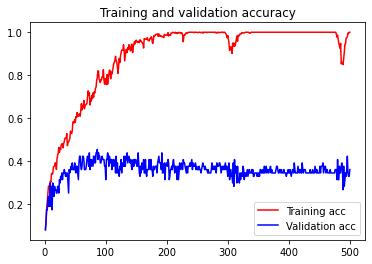

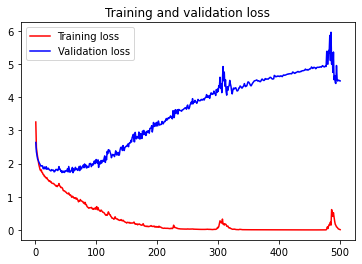

In [27]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Save the model as a file
models.save_model(model, model_filename)

In [29]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

0
23
30
32
39


In [30]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
correct = 0
testRange = 50
for i in range(1, testRange):
    maxV = -1
    predict = -1
    counter = 0
    pre = model.predict(np.expand_dims(x_test[i], 0))
    for j in range(12):
        #print(pre[0][j])
        if(pre[0][j] > maxV):
            maxV = pre[0][j]
            predict = counter
        counter = counter + 1
            
    print('Answer:', y_test[i], ' Prediction:', predict, 'Value:', maxV)
    print("Predict Values", pre)
    if y_test[i] == predict:
        correct = correct+1
print()
print("Test Score: ", correct, "/",testRange," = ", correct/testRange) 

1/1 [==============================] - 0s 188ms/step
Answer: 3.0  Prediction: 8 Value: 0.95606095
Predict Values [[1.6746614e-12 3.6962501e-16 7.4680753e-18 2.0604075e-03 1.2061274e-06
  1.1858376e-05 1.9245181e-02 1.1717171e-03 9.5606095e-01 2.1342162e-02
  1.0642443e-04 2.3638147e-34]]
1/1 [==============================] - 0s 48ms/step
Answer: 11.0  Prediction: 2 Value: 0.9741789
Predict Values [[4.5401184e-03 2.1279970e-02 9.7417891e-01 1.3614845e-11 8.8709526e-11
  1.0269882e-13 4.3208263e-11 4.2810530e-07 1.0440488e-09 1.1055981e-19
  5.4047744e-09 5.0066859e-07]]
1/1 [==============================] - 0s 47ms/step
Answer: 2.0  Prediction: 2 Value: 0.9998524
Predict Values [[8.4537307e-05 1.6641590e-05 9.9985242e-01 2.3475730e-10 4.2399519e-09
  6.9195534e-13 1.3057580e-08 1.3302019e-08 1.1203929e-07 4.5818161e-16
  4.6192574e-05 7.9918609e-15]]
1/1 [==============================] - 0s 27ms/step
Answer: 5.0  Prediction: 4 Value: 0.7420018
Predict Values [[2.29238778e-24 1.620128

In [31]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 15ms/step - loss: 6.2303 - acc: 0.3438


[6.230274677276611, 0.34375]